# Regresi menggunakan MLP

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 14 - Regresi: MLP.**

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.metrics import mean_squared_error

In [2]:
# Parameter training
epochs = 25
batch_size = 32
random_seed = 42

np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## Data Ingestion

In [3]:
# Membaca data dari file CSV
df = pd.read_csv(r'../datasets/power-plant.csv')

## Exploratory Data Analysis

In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
# Menampilkan sampel data
df.head()

AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43

<AxesSubplot:>

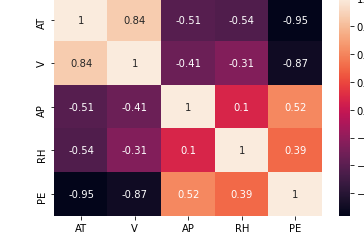

In [6]:
# Correlation heatmap
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

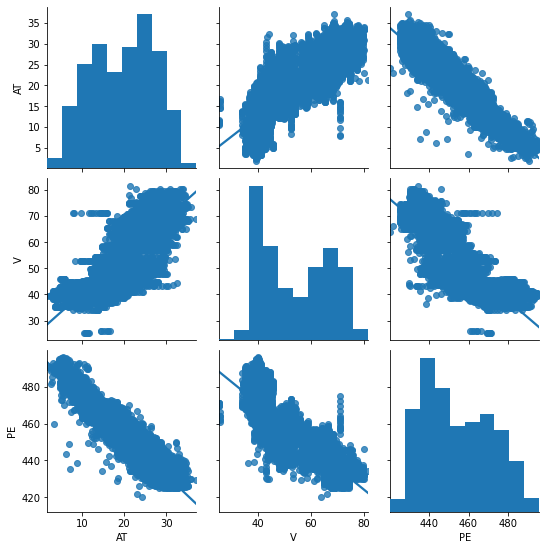

In [7]:
# Pairplot
sns.pairplot(df[["AT", "V", "PE"]], kind="reg")

## Preprocessing

In [8]:
# Memisahkan features dan label
X = df.iloc[:, 0:2].values
y = df.iloc[:, 4].values

## Training

In [9]:
# Membuat arsitektur model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [10]:
# Kompilasi model
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Lakukan training menggunakan data latih
H = model.fit(X, y, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/25
240/240 [==============================] - 1s 6ms/step - loss: 43298.5625 - mae: 169.6479 - mse: 43298.5625 - val_loss: 13680.3711 - val_mae: 105.4886 - val_mse: 13680.3711
Epoch 2/25
240/240 [==============================] - 1s 5ms/step - loss: 12539.9951 - mae: 100.7186 - mse: 12539.9951 - val_loss: 11204.5098 - val_mae: 96.8515 - val_mse: 11204.5098
Epoch 3/25
240/240 [==============================] - 1s 4ms/step - loss: 10433.4678 - mae: 91.2559 - mse: 10433.4678 - val_loss: 9346.3193 - val_mae: 85.5204 - val_mse: 9346.3193
Epoch 4/25
240/240 [==============================] - 1s 4ms/step - loss: 9148.8682 - mae: 83.0401 - mse: 9148.8682 - val_loss: 8405.5137 - val_mae: 78.0417 - val_mse: 8405.5137
Epoch 5/25
240/240 [==============================] - 1s 5ms/step - loss: 8239.2295 - mae: 76.9174 - mse: 8239.2295 - val_loss: 8196.3818 - val_mae: 75.3924 - val_mse: 8196.3818
Epoch 6/25
240/240 [==============================] - 1s 4ms/step - loss: 7448.2300 - mae: 72.328

## Evaluation

In [12]:
# Menampilkan MSE
y_pred = model.predict(X)
mean_squared_error(y, y_pred)

102.80584845298935

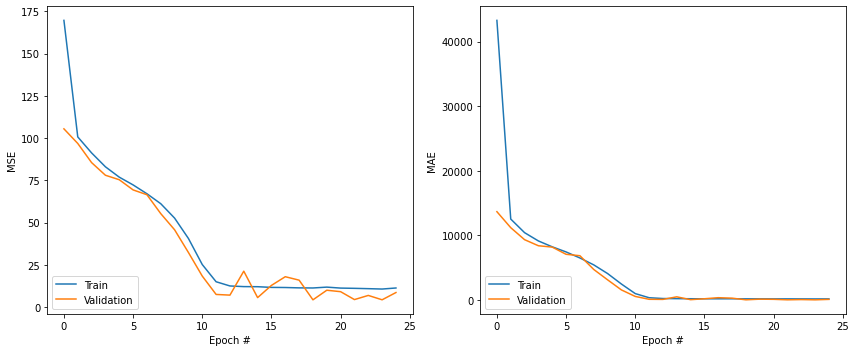

In [13]:
# Tampilkan statistik training model
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), H.history["mae"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_mae"], label="Validation")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("MSE")
ax1.legend(loc="lower left")

ax2 = plt.subplot(1, 2, 2)
plt.plot(np.arange(0, epochs), H.history["mse"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_mse"], label="Validation")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("MAE")
ax2.legend(loc="lower left")

plt.tight_layout()

## Prediction

In [14]:
data_pred = [[33.0, 999.8]]
model.predict(data_pred)

array([[5134.366]], dtype=float32)